### Maxwell's Equations:

Electromagnetic waves are solutions to the Maxwell's equations in a region without charges ($ \rho = 0 $) and currents ($ \mathbf{J} = 0 $). The wave equation for electromagnetic fields can be derived from Maxwell's equations.

In a vacuum or non-conductive medium, Maxwell's equations are:

1. Gauss's law for electricity: $ \nabla \cdot \mathbf{E} = 0 $
2. Gauss's law for magnetism: $ \nabla \cdot \mathbf{B} = 0 $
3. Faraday's law of induction: $ \nabla \times \mathbf{E} = -\frac{\partial \mathbf{B}}{\partial t} $
4. Ampère's law (with Maxwell's addition): $ \nabla \times \mathbf{B} = \mu_0 \epsilon_0 \frac{\partial \mathbf{E}}{\partial t} $

Where $ \mathbf{E} $ is the electric field, $ \mathbf{B} $ is the magnetic field, $ \mu_0 $ is the permeability of free space, and $ \epsilon_0 $ is the permittivity of free space.

### Wave Equation Derivation:

By taking the curl of Faraday's law and substituting in Ampère's law, you can derive the wave equation for the electric field $ \mathbf{E} $:

$$ \nabla \times (\nabla \times \mathbf{E}) = -\frac{\partial}{\partial t}(\nabla \times \mathbf{B}) $$
$$ \nabla(\nabla \cdot \mathbf{E}) - \nabla^2 \mathbf{E} = -\mu_0 \epsilon_0 \frac{\partial^2 \mathbf{E}}{\partial t^2} $$

Since $ \nabla \cdot \mathbf{E} = 0 $, the wave equation simplifies to:

$$ \nabla^2 \mathbf{E} = \mu_0 \epsilon_0 \frac{\partial^2 \mathbf{E}}{\partial t^2} $$

A similar equation can be derived for the magnetic field $ \mathbf{B} $.

### Electromagnetic Wave Equation:

The general form of the electromagnetic wave equation for the electric field in a vacuum is:

$$ \nabla^2 \mathbf{E} - \mu_0 \epsilon_0 \frac{\partial^2 \mathbf{E}}{\partial t^2} = 0 $$

And for the magnetic field:

$$ \nabla^2 \mathbf{B} - \mu_0 \epsilon_0 \frac{\partial^2 \mathbf{B}}{\partial t^2} = 0 $$


## Implementation of Electromagnetic Wave in 1D

Discretization of electromagnetic wave equations in 1D typically refers to the process of converting continuous Maxwell's equations into discrete form that can be solved numerically. This is often done using a method called Finite Difference Time Domain (FDTD), which is a popular choice for solving Maxwell's equations because of its simplicity and robustness. Here's a detailed explanation of the discretization process for 1D electromagnetic waves using FDTD:

### The Yee Grid

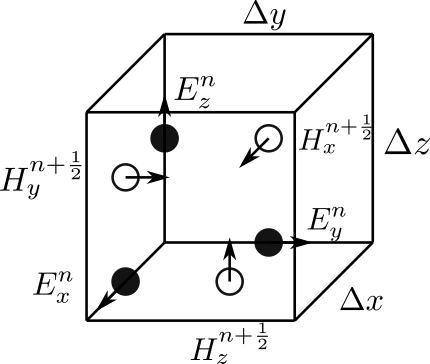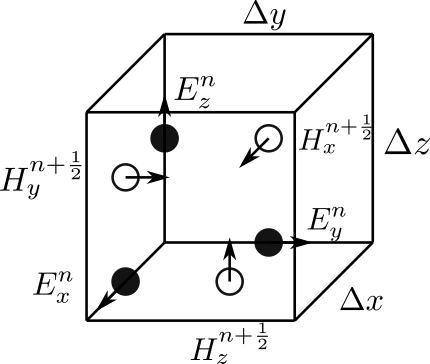

The FDTD method uses a staggered grid, known as the Yee Grid, to discretize the spatial domain. This grid offsets the electric field $ E $ and magnetic field $ H $ components in space such that each field component is defined at alternate half-integer spatial steps. This configuration is chosen to preserve the symmetry of Maxwell's curl equations.

### Maxwell's Equations in 1D

For 1D propagation, let's assume the wave propagates along the z-direction. The relevant Maxwell's equations in 1D are:

$$ \frac{\partial E_y}{\partial z} = -\mu \frac{\partial H_x}{\partial t} $$

$$ \frac{\partial H_x}{\partial z} = -\epsilon \frac{\partial E_y}{\partial t} $$

Here:
- $ E_y $ is the y-component of the electric field.
- $ H_x $ is the x-component of the magnetic field.
- $ \epsilon $ is the permittivity of the medium.
- $ \mu $ is the permeability of the medium.
- $ B = \mu H$ relating the magnetic flux density and the magnetic field strength

### Discretization

The FDTD discretization process involves replacing continuous derivatives with finite differences. For the spatial derivatives, we use the central difference approximation, and for the time derivatives, we use the forward difference approximation.

#### Spatial Discretization

The spatial derivative can be discretized as:

$$ \frac{\partial E_y}{\partial z} \approx \frac{E_y^{(k)}(n) - E_y^{(k-1)}(n)}{\Delta z} $$

$$ \frac{\partial H_x}{\partial z} \approx \frac{H_x^{(k)}(n) - H_x^{(k-1)}(n)}{\Delta z} $$

Where:
- $ \Delta z $ is the spatial step size.
- $ k $ denotes the spatial index.
- $ n $ denotes the time index.

#### Temporal Discretization

The time derivative can be discretized as:

$$ \frac{\partial E_y}{\partial t} \approx \frac{E_y^{(k)}(n+1) - E_y^{(k)}(n)}{\Delta t} $$

$$ \frac{\partial H_x}{\partial t} \approx \frac{H_x^{(k)}(n+1) - H_x^{(k)}(n)}{\Delta t} $$

Where:
- $ \Delta t $ is the time step size.

### FDTD Update Equations

Substituting the discretized derivatives into Maxwell's equations, we obtain the FDTD update equations for 1D:

1. For the electric field:
$ E_y^{(k)}(n+1) = E_y^{(k)}(n) - \frac{\mu \Delta t}{\Delta z} \left( H_x^{(k)}(n) - H_x^{(k-1)}(n) \right) $

2. For the magnetic field:
$ H_x^{(k)}(n+1) = H_x^{(k)}(n) - \frac{\epsilon \Delta t}{\Delta z} \left( E_y^{(k)}(n) - E_y^{(k-1)}(n) \right) $

To implement these equations, you would typically initialize your fields (both electric and magnetic) and then use a loop to iterate over time. In each time step, you'd use the above equations to update the fields at every spatial point.

### Stability and the Courant Condition

For the stability of the FDTD algorithm, the time step $ \Delta t $ must satisfy the Courant condition, which ensures that the numerical domain of dependence encompasses the physical domain of dependence. In 1D, this condition is:

$$ \Delta t \leq \frac{\Delta x}{c} $$

Where $ c = \frac{1}{\sqrt{\mu_0 \epsilon_0}} $ is the speed of light in vacuum.

### Boundary Conditions

In addition to the update equations, appropriate boundary conditions must be applied at the edges of the computational domain to simulate the physical scenario of interest, such as reflective, periodic, or absorbing (Perfectly Matched Layer, PML) boundaries.

This discretization allows for the simulation of electromagnetic wave propagation, reflection, refraction, and absorption in 1D space over time, with applications in antenna design, waveguide analysis, and more.

In [10]:
using Pkg; Pkg.activate("/home/irnaka/SynologyDrive/mydrivegeofisika_adir/Pengajaran_S2/Fisika_Komputasi/fiskom")

  Activating new project at `\home\irnaka\SynologyDrive\mydrivegeofisika_adir\Pengajaran_S2\Fisika_Komputasi\fiskom`


In [17]:
# Import necessary packages
using Plots

# Constants
ε0 = 8.854187817e-12  # Permittivity of free space
μ0 = 1.256637061e-6   # Permeability of free space
c = 1 / sqrt(μ0 * ε0) # Speed of light in vacuum
Δx = 1e-3             # Spatial step (1mm)
Δt = Δx / (2 * c)     # Time step (satisfies Courant condition)

# Domain
grid_size = 2000            # Number of spatial steps
Ex = zeros(grid_size)      # Electric field
Hy = zeros(grid_size)      # Magnetic field

# Source
source_position = Int(grid_size / 4)  # Position of the source in the grid
source_frequency = 2.5e9         # Frequency of the source (2.5 GHz)
ω = 2 * π * source_frequency     # Angular frequency

# Time stepping
time_steps = 1000  # Total number of time steps to simulate

100000

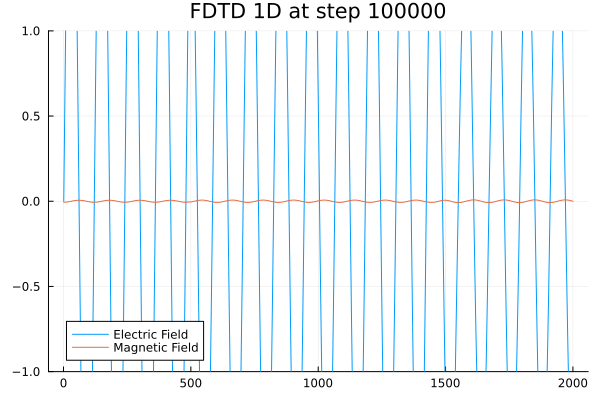

In [19]:
# FDTD loop
for n = 1:time_steps
    # Update magnetic field
    for i = 1:grid_size - 1
        Hy[i] += -Δt / μ0 / Δx * (Ex[i + 1] - Ex[i])
    end

    # Update electric field
    for i = 2:grid_size
        Ex[i] += -Δt / ε0 / Δx * (Hy[i] - Hy[i - 1])
    end

    # Source (a hard source)
    Ex[source_position] += sin(ω * n * Δt)

    # Visualization/plotting at certain time steps
    if n % 50 == 0
        IJulia.clear_output(true)
        plot(Ex, label="Electric Field", ylims=(-1, 1))
        plot!(Hy, label="Magnetic Field", ylims=(-1, 1))
        display(plot!(title="FDTD 1D at step $n"))
        sleep(0.1)
    end
end

## Electromagnetic Wave in 2D

In 2D, these equations can be further simplified depending on the mode of propagation being considered (TE or TM). For the TM mode (transverse magnetic, where the magnetic field is perpendicular to the 2D plane), the PDEs for the electric field component $ E_z $ and the magnetic field components $ H_x $ and $ H_y $ are:

$ \frac{\partial^2 E_z}{\partial x^2} + \frac{\partial^2 E_z}{\partial y^2} = \mu \epsilon \frac{\partial^2 E_z}{\partial t^2} $

$ \frac{\partial^2 H_x}{\partial y^2} - \frac{\partial^2 H_x}{\partial x \partial y} = \mu \epsilon \frac{\partial^2 H_x}{\partial t^2} $

$ \frac{\partial^2 H_y}{\partial x^2} - \frac{\partial^2 H_y}{\partial x \partial y} = \mu \epsilon \frac{\partial^2 H_y}{\partial t^2} $

These equations describe how the electric and magnetic fields evolve over time in response to changes within the fields themselves, as governed by the laws of electromagnetism.

### TE and TM Mode of electromagnetic wave propagation

In the context of electromagnetic waves, particularly when dealing with waveguides or the propagation of waves in bounded or free space, the terms Transverse Electric (TE) and Transverse Magnetic (TM) modes are used to describe the orientation of the electric and magnetic fields with respect to the direction of wave propagation.

#### Transverse Electric (TE) Mode:
- In the TE mode, the electric field ($ E $) is entirely transverse to the direction of wave propagation. This means that there is no electric field component in the direction of propagation.
- The magnetic field ($ H $), on the other hand, has both transverse and longitudinal components, with the transverse component being perpendicular to the electric field.
- TE modes are denoted by $TE_{mn}$ in rectangular waveguides or $TE_{lm}$ in cylindrical waveguides, where $ m $, $ n $, and $ l $ are the mode numbers that define the variation of the field in the respective dimensions.

#### Transverse Magnetic (TM) Mode:
- In the TM mode, the magnetic field is entirely transverse to the direction of wave propagation, which means there is no magnetic field component along the direction of wave travel.
- Conversely, the electric field has both transverse and longitudinal components, with the transverse component being perpendicular to the magnetic field.
- TM modes are denoted by $TM_{mn}$ or $TM_{lm}$ similar to TE modes, with the mode numbers indicating the nature of the field variation.

#### Distinguishing TE and TM Modes:
- The key difference between TE and TM modes is which field (electric or magnetic) is purely transverse. This distinction is important for understanding how electromagnetic waves behave in different media and structures, like waveguides, where certain modes can propagate or be cutoff depending on the frequency and waveguide dimensions.
- In some cases, particularly in optical fibers or in planar waveguides, you may also encounter the hybrid modes denoted as HE and EH, where both electric and magnetic fields have longitudinal components.
- TE and TM modes can be supported by different structures; for instance, a rectangular waveguide typically supports multiple TE and TM modes, but a perfectly conducting spherical waveguide cannot support TE modes due to the boundary conditions at the sphere's surface.

In practice, the existence of TE or TM modes and their properties are determined by solving Maxwell's equations with the appropriate boundary conditions for the medium or structure being considered. The solutions provide the spatial and temporal distribution of the fields for each mode.

## Discretization of electromagnetic in 2D

The discretization of electric and magnetic fields in 2D for the purpose of numerical simulations, such as the Finite-Difference Time-Domain (FDTD) method, involves breaking down the continuous spatial domain into a grid of discrete points and approximating the derivatives in Maxwell's equations using finite differences.

Let's consider a 2D FDTD discretization for the TM mode, where $ E_z $ (electric field component out of the 2D plane) and $ H_x $, $ H_y $ (magnetic field components in the 2D plane) are non-zero. For simplicity, we'll assume a uniform Cartesian grid with grid spacing $ \Delta x $ and $ \Delta y $ in the x and y directions, respectively, and a time step $ \Delta t $.

### Discretization of the Electric Field (E_z):

Maxwell's curl equation for the electric field in continuous form for TM modes is given by:

$
\frac{\partial E_z}{\partial t} = \frac{1}{\epsilon} \left( \frac{\partial H_y}{\partial x} - \frac{\partial H_x}{\partial y} \right)
$

In discretized form, at a grid point $(i, j)$ and time step $n$, this becomes:

$
E_z^{n+1}(i, j) = E_z^n(i, j) + \frac{\Delta t}{\epsilon} \left( \frac{H_y^n(i, j) - H_y^n(i-1, j)}{\Delta x} - \frac{H_x^n(i, j) - H_x^n(i, j-1)}{\Delta y} \right)
$

### Discretization of the Magnetic Fields (H_x and H_y):

Maxwell's curl equation for the magnetic field in continuous form for TM modes can be written for each component as:

$
\frac{\partial H_x}{\partial t} = -\frac{1}{\mu} \frac{\partial E_z}{\partial y}
$
$
\frac{\partial H_y}{\partial t} = \frac{1}{\mu} \frac{\partial E_z}{\partial x}
$

The discretized versions are as follows:

For $ H_x $:
$
H_x^{n+1/2}(i, j+1/2) = H_x^{n-1/2}(i, j+1/2) - \frac{\Delta t}{\mu} \frac{E_z^n(i, j+1) - E_z^n(i, j)}{\Delta y}
$

For $ H_y $:
$
H_y^{n+1/2}(i+1/2, j) = H_y^{n-1/2}(i+1/2, j) + \frac{\Delta t}{\mu} \frac{E_z^n(i+1, j) - E_z^n(i, j)}{\Delta x}
$

In these equations, $ \epsilon $ is the permittivity, and $ \mu $ is the permeability of the medium. The $ n $, $ i $, and $ j $ indices represent the time step and spatial grid points in the x and y directions, respectively. The staggered grid, known as the Yee grid, is often used in FDTD methods where electric and magnetic fields are computed at alternating half-integer time steps to maintain numerical stability and to mimic the physical coupling between the fields.

This discretization provides a direct update scheme for the fields at every time step based on the fields at the previous time step and the neighboring spatial points. This scheme is iteratively applied to simulate the propagation of electromagnetic waves over time within the 2D domain.

### Assignment

- Implement 2D Electromagnetic wave using FDTD in TM mode!